## Teste NeuPy com a função sin(x)

Primeiro, vamos importar alguns módulos necessários

In [1]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np
import random

from neupy import environment, algorithms, layers, plots
from neupy.exceptions import StopTraining

from sklearn.model_selection import train_test_split
import theano

theano.config.floatX = 'float32'

environment.reproducible()

Criando um array com a função seno (adicionada de um "noise" aleatório)

In [2]:
x = np.linspace(0, 2 * np.pi, num=200)
y = np.sin(x)
y = np.vectorize(lambda n: n + random.random() * 0.1)(y)

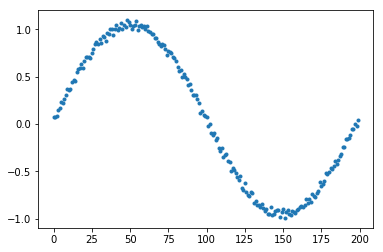

In [3]:
pyplot.plot(y, '.')

Agora vamos separar os dados de entrada em um conjunto para treinamento e outro para teste

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x.astype(np.float32),
    y.astype(np.float32),
    train_size=(4 / 5)
)

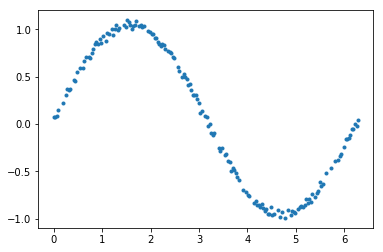

In [5]:
pyplot.plot(x_train, y_train, '.')

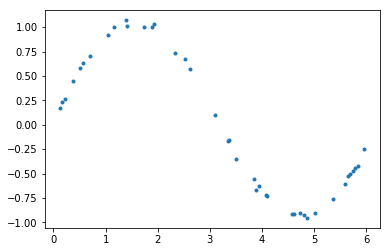

In [6]:
pyplot.plot(x_test, y_test, '.')

In [7]:
def on_epoch_end(net):
    if net.errors.last() < 0.01:
        raise StopTraining("Training has been interrupted")


net = algorithms.GradientDescent(
    [
        layers.Input(1),
        layers.Tanh(5),
        layers.Linear(1),
    ],
    verbose=True,
    show_epoch=50,
    epoch_end_signal=on_epoch_end,
)


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = on_epoch_end
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.82 seconds


In [8]:
net.architecture()


Network's architecture

-----------------------------------------------
| # | Input shape | Layer Type | Output shape |
-----------------------------------------------
| 1 | 1           | Input      | 1            |
| 2 | 1           | Tanh       | 5            |
| 3 | 5           | Linear     | 1            |
-----------------------------------------------



In [9]:
net.train(x_train, y_train, x_test, y_test, epochs=10000)


Start training

[TRAINING DATA] shapes: (160, 1)
[TEST DATA] shapes: (40, 1)
[TRAINING] Total epochs: 10000

------------------------------------------------
| Epoch # | Train err | Valid err | Time       |
------------------------------------------------
| 1       | 0.4118    | 0.3378    | 0 ms       |
| 50      | 0.1734    | 0.1466    | 0 ms       |
| 100     | 0.1247    | 0.0967    | 0 ms       |
| 150     | 0.08799   | 0.06414   | 0 ms       |
| 200     | 0.07159   | 0.04953   | 0 ms       |
| 250     | 0.06359   | 0.04208   | 0 ms       |
| 300     | 0.05936   | 0.03859   | 0 ms       |
| 350     | 0.05677   | 0.03662   | 0 ms       |
| 400     | 0.0549    | 0.03521   | 0 ms       |
| 450     | 0.05342   | 0.03409   | 0 ms       |
| 500     | 0.05221   | 0.03313   | 0 ms       |
------------------------------------------------
| Too many outputs in the terminal. Set up     |
| logging after each 4900 epochs               |
------------------------------------------------
| 4900  

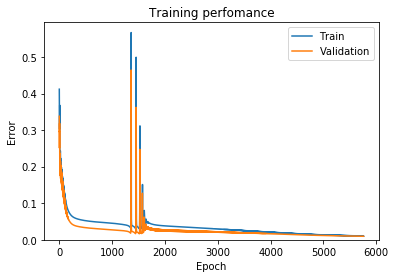

In [10]:
plots.error_plot(net)

Vamos testar a nossa rede com o linspace inicial

In [11]:
y_out = net.predict(x)

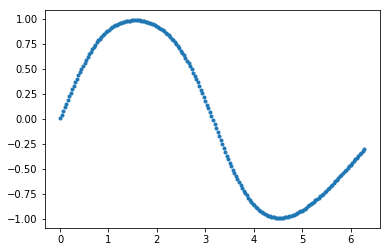

In [12]:
pyplot.plot(x, y_out, '.')